In [3]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2', device=device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!


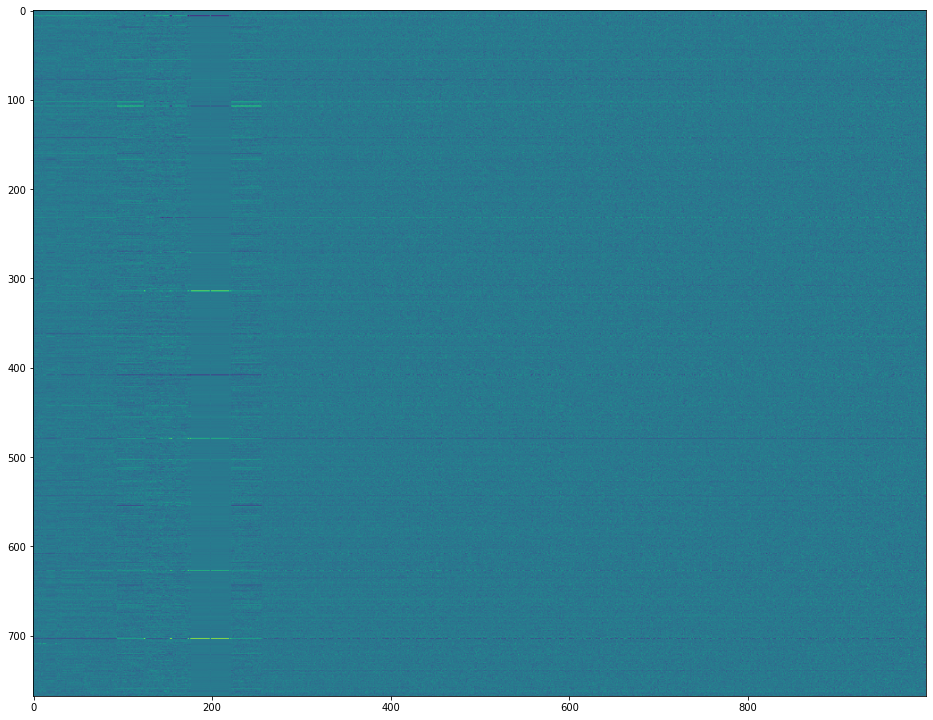

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(unembed[:,:1000])

In [19]:
from sklearn.cluster import SpectralCoclustering
clustering = SpectralCoclustering(n_clusters=50).fit(unembed)

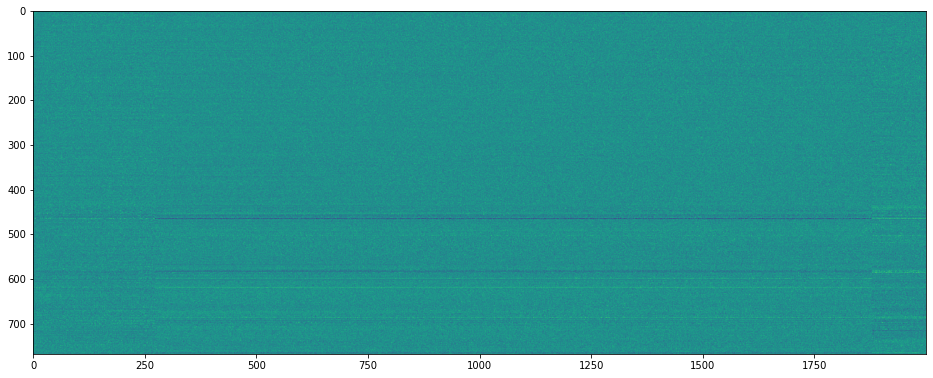

In [20]:
row_values = [(label, i) for i,label in enumerate(clustering.row_labels_)]
row_values.sort()
row_indices = [i for label,i in row_values]

column_values = [(label, i) for i,label in enumerate(clustering.column_labels_)]
column_values.sort()
column_indices = [i for label,i in column_values]

reordered = unembed[row_indices,:][:,column_indices]
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(torch.clamp(reordered[:,:2000], -1, 1))